# 学习神经网络

不进行神经网络的学习，就做不到“好的推理”​。所谓推理，就是对上一节介绍的多类别分类等问题给出回答的任务。而神经网络的学习的任务是寻找最优参数。不进行神经网络的学习，就做不到“好的推理”​。因此，常规的流程是，首先进行学习，然后再利用学习好的参数进行推理。

损失是衡量神经网络学习好坏的一种指标，是指示学习阶段中某个时间点的神经网络的性能。基于监督数据（学习阶段获得的正确解数据）和神经网络的预测结果，将模型的恶劣程度作为标量（单一数值）计算出来，得到的就是损失。

### 损失函数

损失函数是计算神经网络的一种方法。损失函数有多种，当进行多类别分类的神经网络通常使用交叉熵误差（cross entropy error）作为损失函数。此时，交叉熵误差由神经网络输出的各类别的概率和监督标签求得。

根据之前介绍过的神经网络，从结果的三输出来看，可以视作为一种多分类神经网络。所以在原有的层基础上我们再加上交叉熵误差作为损失函数。

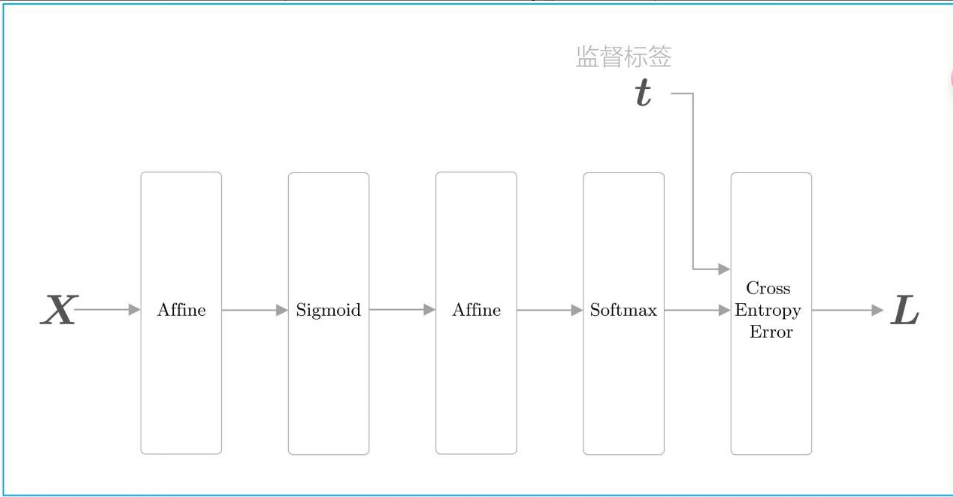

在上图中，X是输入数据，t是监督标签，L是损失。此时，Softmax层的输出是概率，该概率和监督标签被输入Cross Entropy Error层。

SoftMax函数：

$$ y_k = \frac{e^{s_k}}{\sum_{j=1}^{n} e^{s_i}} $$


当输出总共有n个时，计算第k个输出yk时的算式。这个yk是对应于第k个类别的Softmax函数的输出。如上式所示，Softmax函数的分子是得分sk的指数函数，分母是所有输入信号的指数函数的和。Softmax函数输出的各个元素是0.0～1.0的实数。另外，如果将这些元素全部加起来，则和为1。因此，Softmax的输出可以解释为概率。之后，这个概率会被输入交叉熵误差。此时，

交叉熵误差可由下式表示：

$$ L = - \sum_{i=1}^{n} t_k \log(\hat{y}_k) $$

这里，tk是对应于第k个类别的监督标签。log是以纳皮尔数e为底的对数（严格地说，应该记为loge）​。监督标签以one-hot向量的形式表示，比如t=（0, 0,1）​。

### Tip:One-hot向量

one-hot向量是一个元素为1，其他元素为0的向量。因为元素1对应正确解的类，所以式（1.7）实际上只是在计算正确解标签为1的元素所对应的输出的自然对数（log）​。

在考虑了mini-batch处理的情况下，交叉熵误差可以由下式表示：

$$ L = - \frac{1}{N} \sum_{n} \sum_{k} t_{nk} \log(\hat{y}_{nk}) $$


这里假设数据有N笔，tnk表示第n笔数据的第k维元素的值，ynk表示神经网络的输出，tnk表示监督标签。式（1.8）看上去有些复杂，其实只是将表示单笔数据的损失函数的公式扩展到了N笔数据的情况。用上式除以N，可以求单笔数据的平均损失。通过这样的平均化，无论mini-batch的大小如何，都始终可以获得一致的指标。

为了使学习变得简单愉快，下面我们将计算Softmax函数和交叉熵误差的层实现为Softmax with Loss层（通过整合这两个层，反向传播的计算会变简单）​。

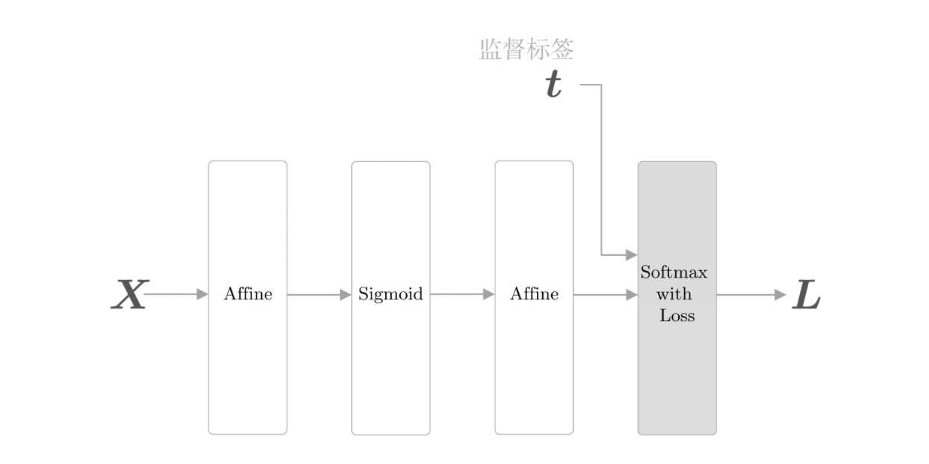

### 导数与梯度

神经网络的学习目标是找到尽可能小的参数。而想找到这些参数，导数和梯度非常重要。

导数定义：导数是数学中微积分的一个重要概念，描述了一个函数在某一点的斜率或者一个函数的变化率。


假设有一个函数$ y=f(x) $,此时，$y$关于$x$的导数记为$ \frac{dy}{dx} $,这个式子的含义是随着x的微小变化y的变化程度。

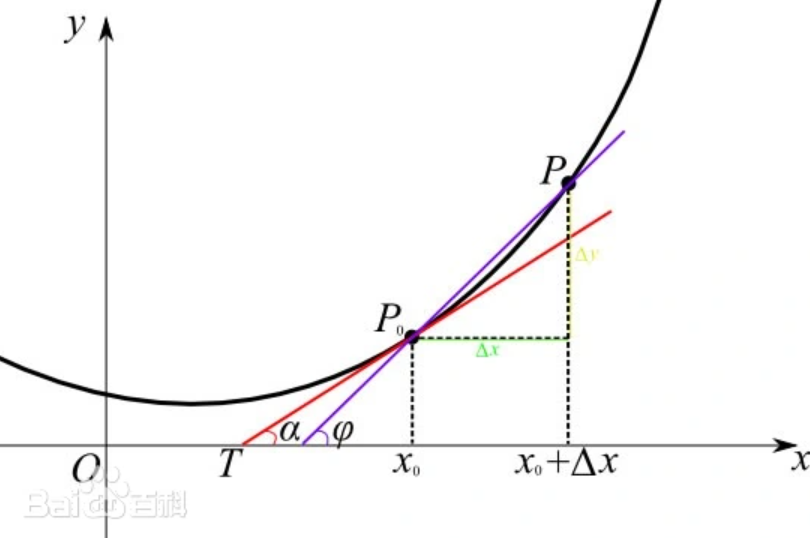

比如，$y = x^2$,其导数为$\frac{dy}{dx} = 2x$,这个导数结果表示x在各处的变化程度。实际上就相当于函数的斜率。

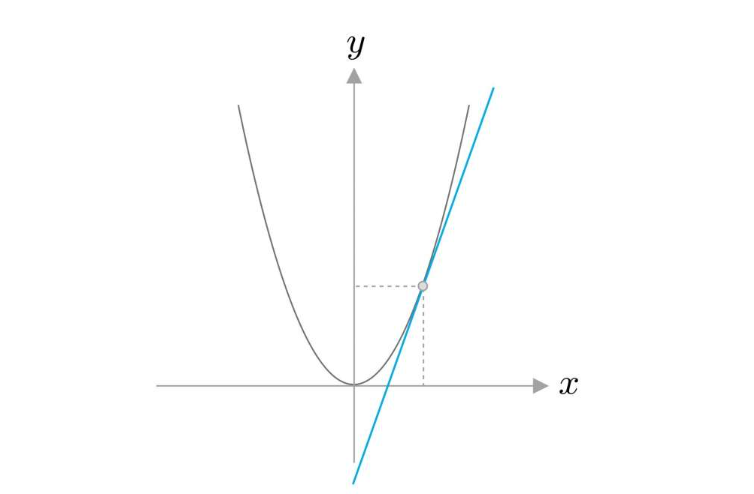

在上图中，我们求了关于x这一个变量的导数，其实同样可以求关于多个变量（多变量）的导数。假设有函数$ L=f（x）$​，其中L是标量，x是向量。此时，L关于$x_i$（x的第i个元素）的导数可以写成$\frac{\partial L}{\partial {x_i}}$。另外，也可以求关于向量的其他元素的导数，我们将其整理如下：
$$ \frac{\partial L}{\partial x} = (\frac{\partial L}{\partial x_1},\frac{\partial L}{\partial x_2},....,\frac{\partial L}{\partial x_n}) $$

像这样，将关于向量各个元素的导数罗列到一起，就得到了梯度（gradient）​。

梯度的定义：梯度一词有时用于斜度，也就是**一个曲面沿着给定方向的倾斜程度。** 可以通过取向量梯度和所研究的方向的点积来得到斜度。 梯度的数值有时也被称为梯度。 梯度的本意是一个向量（矢量），表示某一函数在该点处的方向导数沿着该方向取得最大值，即函数在该点处沿着该方向（此梯度的方向）变化最快，变化率最大（为该梯度的模）。

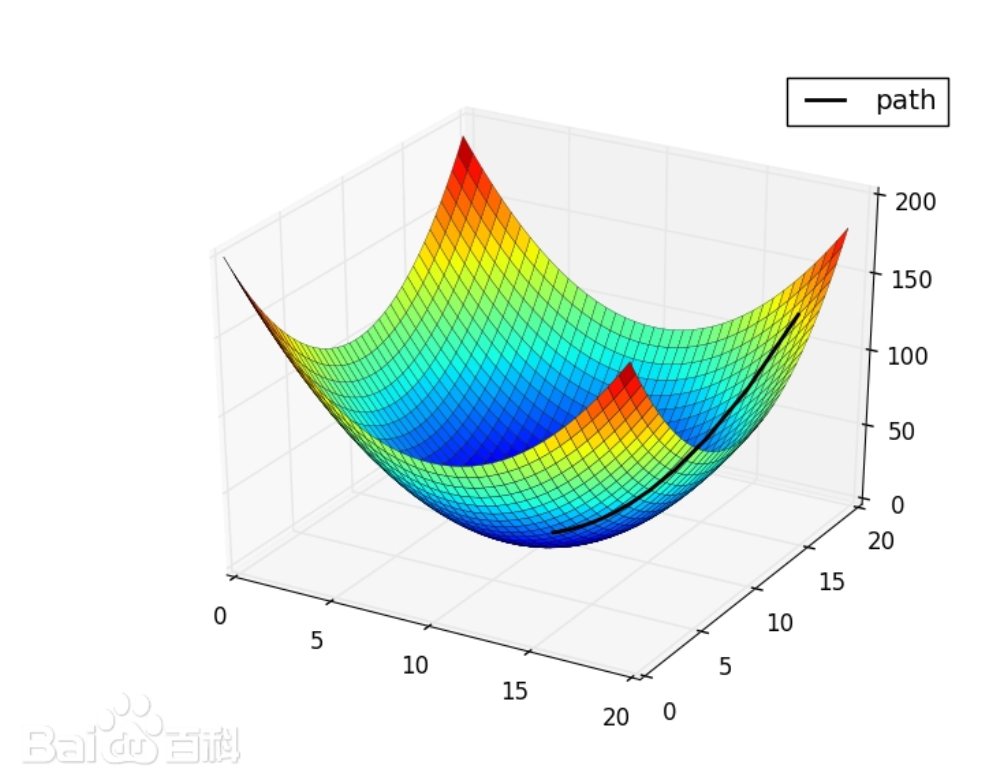

另外，矩阵也可以像向量一样求梯度。假设W是一个m×n的矩阵，则函数L=g（W）的梯度如下所示：

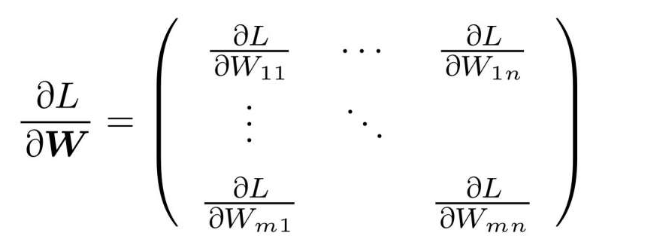

如上式所示，L关于W的梯度可以写成矩阵（准确地说，矩阵的梯度的定义如上所示）​。这里的重点是，W和$\frac{\partial L}{\partial W}$具有相同的形状。利用“矩阵和其梯度具有相同形状”这一性质，可以轻松地进行参数的更新和链式法则（后述）的实现。

### Tip:严格地说

本书使用的“梯度”一词与数学中的“梯度”是不同的。数学中的梯度仅限于关于向量的导数。而在深度学习领域，一般也会定义关于矩阵和张量的导数，称为“梯度”​。

### 链式法则

实际上，神经网络除了第1层和第n层的每一层（n-1层）都有前接后继的关系，其中隐藏层中的每个神经元都含有一个激活函数，输入经过全连接层的仿射关系（$ H = WX+B $）后,在进入隐藏层神经元的激活函数中得到$a(H)$,再经过后面的$Sigmoid$函数进行非线性拟合，在得到一个新的函数$Sigmoid(a(H))$,以此类推，再仿射，再激活，再非线性拟合……这个过程实际上就是一个不断地函数复合的过程。

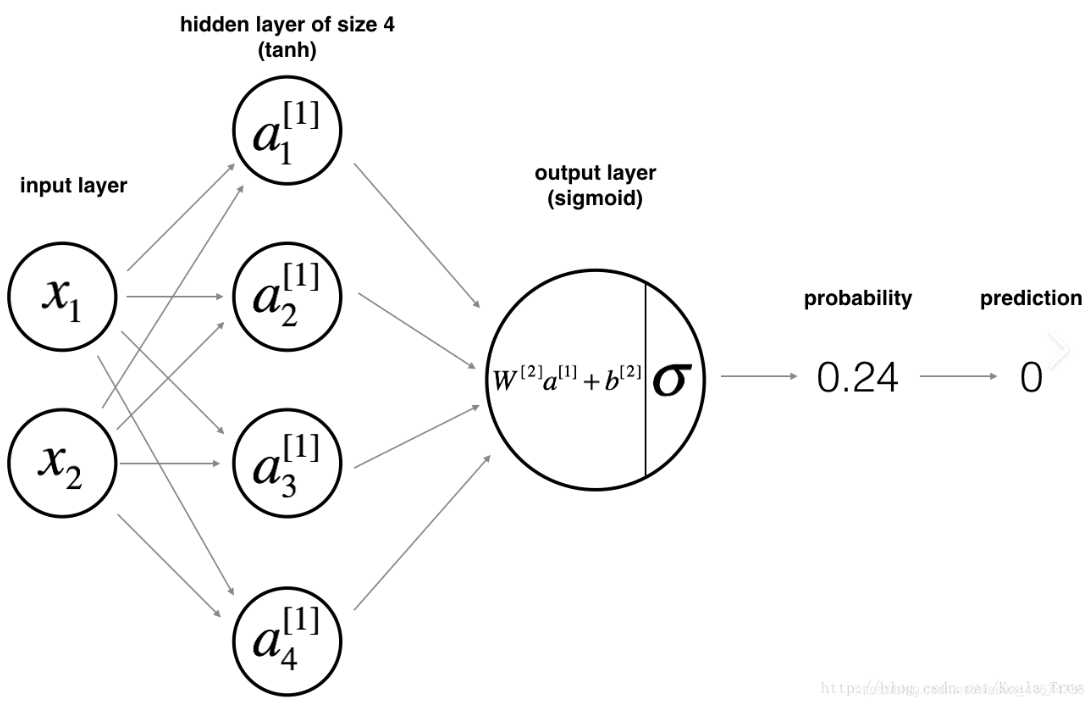

(分享一个好玩的神经网络可视化网站：)[https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.40401&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false]


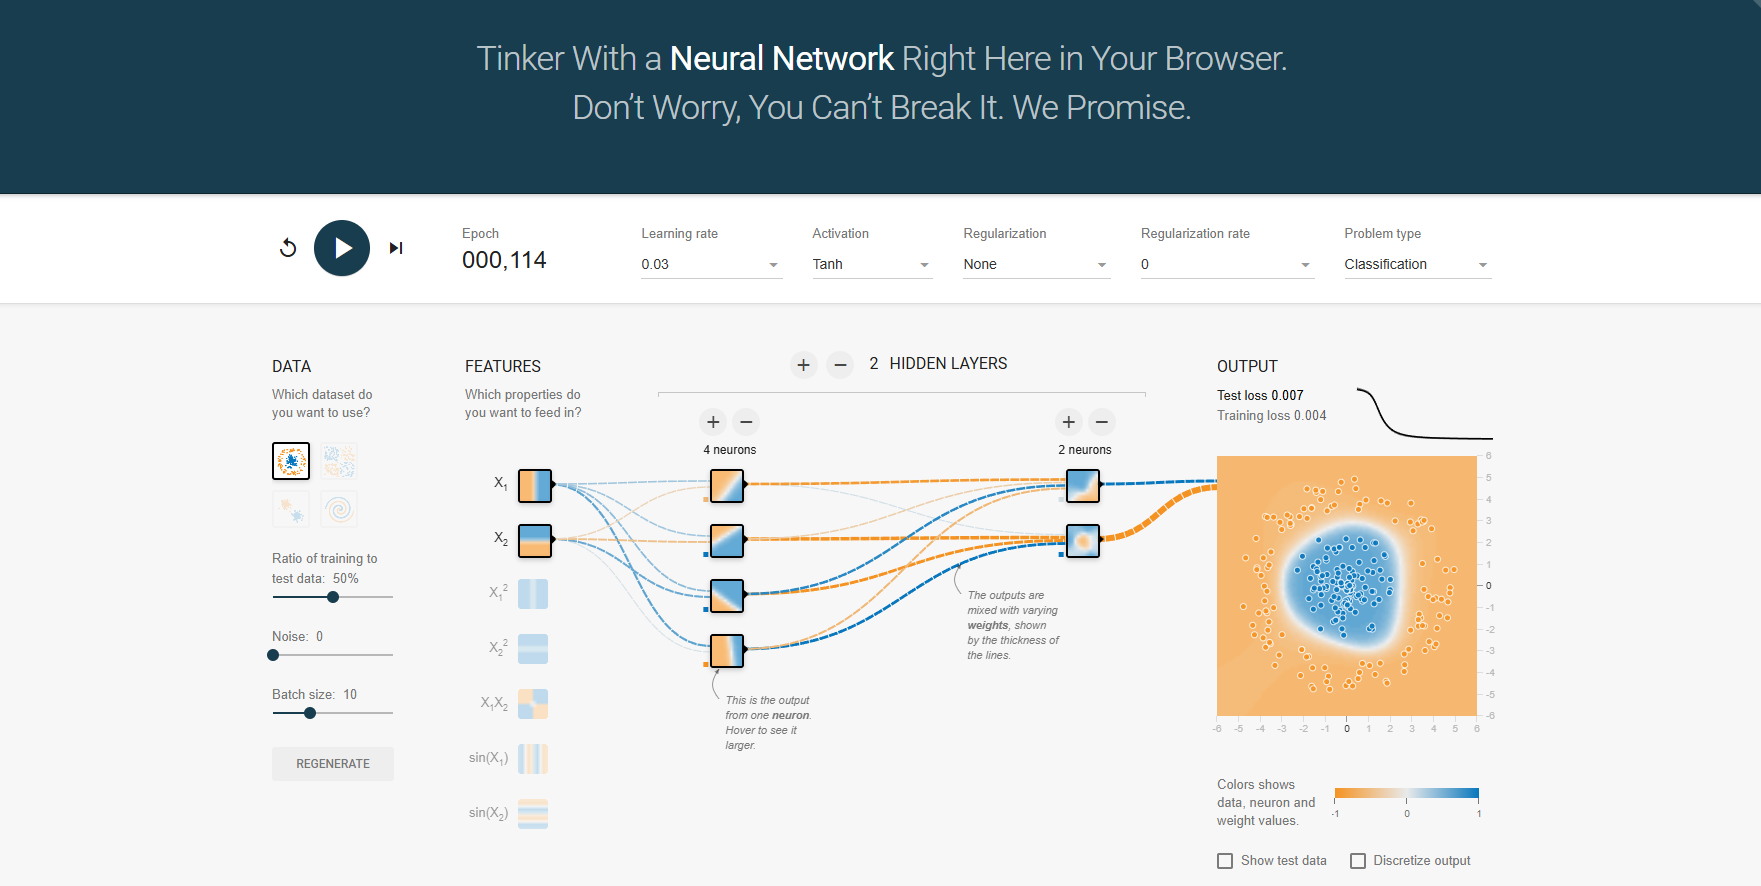

学习阶段的神经网络在给定学习数据后会输出损失。这里我们想得到的是损失关于各个参数的梯度。只要得到了它们的梯度，就可以使用这些梯度进行参数更新。那么，神经网络的梯度怎么求呢？这就轮到误差反向传播法出场了。

理解误差反向传播法的关键是链式法则。链式法则是复合函数的求导法则，其中复合函数是由多个函数构成的函数。

现在，我们来学习链式法则。这里考虑y=f（x）和z=g（y）这两个函数。如z=g（f（x）​）所示，最终的输出z由两个函数计算而来。此时，z关于x的导数可以按下式求得：

$$ \frac{\partial z}{\partial x} = \frac{\partial z}{\partial y}·\frac{\partial y}{\partial x}$$

如式所示，z关于x的导数由y=f（x）的导数和z=g（y）的导数之积求得，这就是链式法则。链式法则的重要之处在于，无论我们要处理的函数有多复杂（无论复合了多少个函数）​，都可以根据它们各自的导数来求复合函数的导数。也就是说，只要能够计算各个函数的局部的导数，就能基于它们的积计算最终的整体的导数。

### 计算图